In [1]:
import pypsa

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

ERROR 1: PROJ: proj_create_from_database: Open of /fp/homes01/u01/ec-koenvg/.conda/envs/my_base/envs/eu-hydrogen/share/proj failed


In [2]:
results_dir = "../results"
labelsize = 7
# cm in inch
cm = 1 / 2.54

horizons = [2025, 2030, 2035, 2040, 2045, 2050]

demand_ylim_high = 10000
demand_ylim_med = 5500
demand_ylim_low = 500

In [3]:
def prepare_demand(balances, carrier, selection):
    dfs = []
    for y in horizons:
        df = balances[y].xs(carrier, level="bus_carrier") / 1e6
        df.index = df.index.droplevel("component")
        # Drop duplicate index entries
        df = df.loc[~df.index.duplicated()]
        df = (
            -df.reindex(index=selection.keys())
            .fillna(0)
            .rename(index=selection)
        )
        # Group by and sum over duplicates
        df = df.groupby(level=0).sum()
        dfs.append(df)

    df = pd.concat(dfs, axis=1)
    df.columns = horizons
    return df


def plot_demand(df, title, ylabel, ylim, fn, legend_below=False):
    fig, ax = plt.subplots(figsize=(9 * cm, 6 * cm))
    df.T.plot(kind="bar", stacked=True, ax=ax, color=plt.cm.tab20.colors)
    max_y = df.sum(axis=0).max()
    ax.set_ylim(0, ylim)
    ax.set_ylabel(ylabel, fontsize=labelsize + 1)
    ax.tick_params(axis="x", bottom=False, rotation=0, labelsize=labelsize)
    ax.tick_params(axis="y", labelsize=labelsize)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.grid(axis="y", which="major")
    ax.grid(axis="y", which="minor", linestyle="--")
    ax.set_axisbelow(True)
    plt.legend(
        reverse=True,
        fontsize=labelsize,
        **({"loc": "upper center", "bbox_to_anchor": (0.5, -0.2), "ncols": 2} if legend_below else {}),
    )
    plt.title(title, fontsize=labelsize + 1)
    plt.tight_layout()
    plt.savefig(fn, transparent=True, bbox_inches="tight")
    plt.show()

In [4]:
networks = {
    y: pypsa.Network(
        f"../results/Y1987_Bb/postnetworks/base_s_60_lc1.5__Cc-Ia-Ea_{y}.nc"
    )
    for y in horizons
}

INFO:pypsa.io:Imported network base_s_60_lc1.5__Cc-Ia-Ea_2025.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network base_s_60_lc1.5__Cc-Ia-Ea_2030.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network base_s_60_lc1.5__Cc-Ia-Ea_2035.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network base_s_60_lc1.5__Cc-Ia-Ea_2040.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network base_s_60_lc1.5__Cc-Ia-Ea_2045.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network base_s_60_lc1.5__Cc-Ia-Ea_2050.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


In [5]:
balances = {y: networks[y].statistics.energy_balance(nice_names=False) for y in horizons}

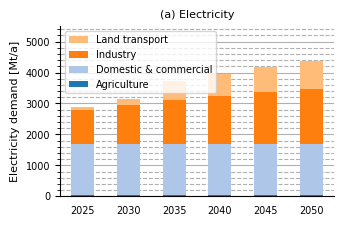

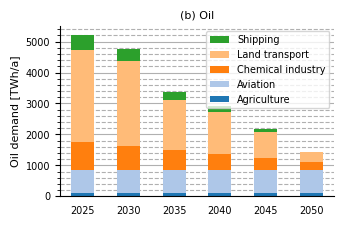

In [6]:
fixed_demands_AC = {
    "electricity": "Domestic & commercial",
    "industry electricity": "Industry",
    "agriculture electricity": "Agriculture",
    "BEV charger": "Land transport",
}

df = prepare_demand(balances, "AC", fixed_demands_AC)
plot_demand(df, "(a) Electricity", "Electricity demand [Mt/a]", demand_ylim_med, "figures/demand_fixed_AC.pdf")


fixed_demands_oil = {
    "agriculture machinery oil": "Agriculture",
    "kerosene for aviation": "Aviation",
    "naphtha for industry": "Chemical industry",
    "shipping oil": "Shipping",
    "land transport oil": "Land transport",
}

df = prepare_demand(balances, "oil", fixed_demands_oil)
plot_demand(df, "(b) Oil", "Oil demand [TWh/a]", demand_ylim_med, "figures/demand_fixed_oil.pdf")

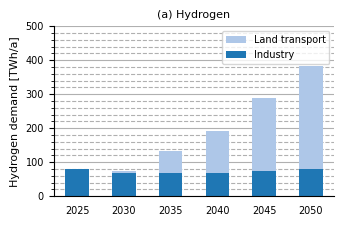

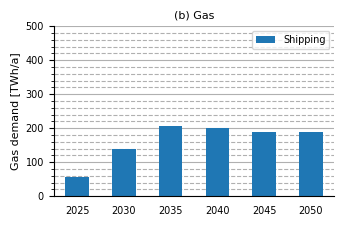

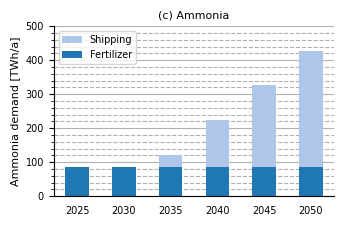

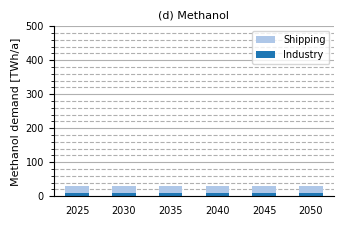

In [7]:
fixed_demands_h2 = {
    "H2 for industry": "Industry",
    "land transport fuel cell": "Land transport",
}
df = prepare_demand(balances, "H2", fixed_demands_h2)
plot_demand(df, "(a) Hydrogen", "Hydrogen demand [TWh/a]", demand_ylim_low, "figures/demand_fixed_h2.pdf")

fixed_demands_gas = {
    "shipping gas": "Shipping",
}
df = prepare_demand(balances, "gas", fixed_demands_gas)
plot_demand(df, "(b) Gas", "Gas demand [TWh/a]", demand_ylim_low, "figures/demand_fixed_gas.pdf")

fixed_demands_ammonia = {
    "NH3": "Fertilizer",
    "shipping ammonia": "Shipping",
}
df = prepare_demand(balances, "NH3", fixed_demands_ammonia)
plot_demand(df, "(c) Ammonia", "Ammonia demand [TWh/a]", demand_ylim_low, "figures/demand_fixed_ammonia.pdf")

fixed_demands_methanol = {
    "shipping methanol": "Shipping",
    "industry methanol": "Industry",
}
df = prepare_demand(balances, "methanol", fixed_demands_methanol)
plot_demand(df, "(d) Methanol", "Methanol demand [TWh/a]", demand_ylim_low, "figures/demand_fixed_methanol.pdf")

In [8]:
prepare_demand(balances, "H2", fixed_demands_h2)

,2025,2030,2035,2040,2045,2050
carrier,,,,,,
Industry,79.93,68.700000,68.490000,69.310000,73.980000,79.300000
Land transport,0.00,6.757899,65.889513,123.331652,214.563285,304.105444
